In [ ]:
# Install OpenCV library jika belum diinstal
!pip install opencv-python

import cv2
import os

# Pastikan nama file sesuai dengan video yang sudah diunggah
video_path = '/content/drive/MyDrive/Deep Learning/Kelompok/UAS - Deep Learning - ANN/video/batang.mp4'  # Ganti dengan path video
output_dir = '/content/drive/MyDrive/Deep Learning/Kelompok/UAS - Deep Learning - ANN/gambar/batang'  # Folder tempat menyimpan gambar

# Buat folder jika belum ada
os.makedirs(output_dir, exist_ok=True)

# Baca video
cap = cv2.VideoCapture(video_path)
frame_number = 0

# Loop untuk membaca setiap frame
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    # Simpan frame sebagai gambar
    frame_path = os.path.join(output_dir, f'frame_{frame_number:04d}.jpg')
    cv2.imwrite(frame_path, frame)
    frame_number += 1

cap.release()
print(f'Proses selesai! Frame disimpan di {output_dir}')

Proses selesai! Frame disimpan di /content/drive/MyDrive/Deep Learning/Kelompok/UAS - Deep Learning - ANN/gambar/batang


In [ ]:
# Pastikan nama file sesuai dengan video yang sudah diunggah
video_path = '/content/drive/MyDrive/Deep Learning/Kelompok/UAS - Deep Learning - ANN/video/daun.mp4'  # Ganti dengan path video
output_dir = '/content/drive/MyDrive/Deep Learning/Kelompok/UAS - Deep Learning - ANN/gambar/daun'  # Folder tempat menyimpan gambar

# Buat folder jika belum ada
os.makedirs(output_dir, exist_ok=True)

# Baca video
cap = cv2.VideoCapture(video_path)
frame_number = 0

# Loop untuk membaca setiap frame
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    # Simpan frame sebagai gambar
    frame_path = os.path.join(output_dir, f'frame_{frame_number:04d}.jpg')
    cv2.imwrite(frame_path, frame)
    frame_number += 1

cap.release()
print(f'Proses selesai! Frame disimpan di {output_dir}')

Proses selesai! Frame disimpan di /content/drive/MyDrive/Deep Learning/Kelompok/UAS - Deep Learning - ANN/gambar/daun


In [ ]:
# Pastikan nama file sesuai dengan video yang sudah diunggah
video_path = '/content/drive/MyDrive/Deep Learning/Kelompok/UAS - Deep Learning - ANN/video/buah.mp4'  # Ganti dengan path video
output_dir = '/content/drive/MyDrive/Deep Learning/Kelompok/UAS - Deep Learning - ANN/gambar/buah'  # Folder tempat menyimpan gambar

# Buat folder jika belum ada
os.makedirs(output_dir, exist_ok=True)

# Baca video
cap = cv2.VideoCapture(video_path)
frame_number = 0

# Loop untuk membaca setiap frame
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    # Simpan frame sebagai gambar
    frame_path = os.path.join(output_dir, f'frame_{frame_number:04d}.jpg')
    cv2.imwrite(frame_path, frame)
    frame_number += 1

cap.release()
print(f'Proses selesai! Frame disimpan di {output_dir}')

Proses selesai! Frame disimpan di /content/drive/MyDrive/Deep Learning/Kelompok/UAS - Deep Learning - ANN/gambar/buah


In [ ]:
# Mengimport Library yang digunakan
import tensorflow as tf
import zipfile,os,shutil
import numpy as np
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
# Penggunaan Callback mencegah overfitting dan menghentikan training setelah akurasi terpenuhi
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.97):
      print("\nAkurasi melewati 97%, hentikan proses training!")
      self.model.stop_training = True

callbacks = myCallback()

In [ ]:
# split dataset kemudian membuat direktori
base_dir = '/content/drive/MyDrive/Deep Learning/Kelompok/UAS - Deep Learning - ANN/gambar'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir, 'val')
roc_dir = os.path.join(base_dir,'batang')
pap_dir = os.path.join(base_dir, 'buah')
sci_dir = os.path.join(base_dir, 'daun')

In [ ]:
os.mkdir(train_dir)
os.mkdir(validation_dir)

In [ ]:
train_roc = os.path.join(train_dir, 'batang')
train_pap = os.path.join(train_dir, 'buah')
train_sci = os.path.join(train_dir, 'daun')
val_roc = os.path.join(validation_dir, 'batang')
val_pap = os.path.join(validation_dir, 'buah')
val_sci = os.path.join(validation_dir, 'daun')

In [ ]:
os.mkdir(train_roc)
os.mkdir(train_pap)
os.mkdir(train_sci)
os.mkdir(val_roc)
os.mkdir(val_pap)
os.mkdir(val_sci)

In [ ]:
import os

# Fungsi untuk menghitung jumlah gambar dalam folder
def count_images_in_directory(directory):
    # Mengambil semua file di dalam folder dan memfilter hanya file gambar (misalnya .jpg, .png)
    image_files = [f for f in os.listdir(directory) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    return len(image_files), image_files

# Daftar direktori yang ada
directories = {
    'Batang Directory': roc_dir,
    'Buah Directory': pap_dir,
    'Daun Directory': sci_dir
}

total_images = 0  # Variabel untuk menghitung total jumlah gambar di semua direktori

# Mengecek jumlah gambar di setiap direktori
for dir_name, dir_path in directories.items():
    num_images, image_files = count_images_in_directory(dir_path)
    total_images += num_images  # Menambahkan jumlah gambar di direktori ini ke total
    print(f"{dir_name}: {num_images} images")
    print("Sample images:", image_files[:5])  # Menampilkan 5 gambar pertama sebagai contoh
    print("\n")

# Menampilkan total jumlah gambar di semua direktori
print(f"Total number of images in all directories: {total_images}")


Batang Directory: 2465 images
Sample images: ['frame_0000.jpg', 'frame_0001.jpg', 'frame_0002.jpg', 'frame_0003.jpg', 'frame_0004.jpg']


Buah Directory: 2421 images
Sample images: ['frame_0000.jpg', 'frame_0001.jpg', 'frame_0002.jpg', 'frame_0003.jpg', 'frame_0004.jpg']


Daun Directory: 1821 images
Sample images: ['frame_0000.jpg', 'frame_0001.jpg', 'frame_0002.jpg', 'frame_0003.jpg', 'frame_0004.jpg']


Total number of images in all directories: 6707


In [ ]:
# train dan test split
# memecah setiap direktori menjadi data train dan data validasi(validation 40% of dataset)
train_roc_dir, val_roc_dir = train_test_split(os.listdir(roc_dir), test_size = 0.40)
train_pap_dir, val_pap_dir = train_test_split(os.listdir(pap_dir), test_size = 0.40)
train_sci_dir, val_sci_dir = train_test_split(os.listdir(sci_dir), test_size = 0.40)

In [ ]:
for file in train_roc_dir:
    if os.path.isfile(os.path.join(roc_dir, file)):  # Check if it's a file
        shutil.copy(os.path.join(roc_dir, file), os.path.join(train_roc, file))
for file in train_pap_dir:
    if os.path.isfile(os.path.join(pap_dir, file)):  # Check if it's a file
        shutil.copy(os.path.join(pap_dir, file), os.path.join(train_pap, file))
for file in train_sci_dir:
    if os.path.isfile(os.path.join(sci_dir, file)):  # Check if it's a file
        shutil.copy(os.path.join(sci_dir, file), os.path.join(train_sci, file))
for file in val_roc_dir:
    if os.path.isfile(os.path.join(roc_dir, file)):  # Check if it's a file
        shutil.copy(os.path.join(roc_dir, file), os.path.join(val_roc, file))
for file in val_pap_dir:
    if os.path.isfile(os.path.join(pap_dir, file)):  # Check if it's a file
        shutil.copy(os.path.join(pap_dir, file), os.path.join(val_pap, file))
for file in val_sci_dir:
    if os.path.isfile(os.path.join(sci_dir, file)):  # Check if it's a file
        shutil.copy(os.path.join(sci_dir, file), os.path.join(val_sci, file))

In [ ]:
# augmentation and generate image data
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest',
)
test_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    vertical_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest'
)


In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size= 32,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 4023 images belonging to 3 classes.
Found 2684 images belonging to 3 classes.


In [ ]:
# Model ANN
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(150, 150, 3)),    # Flatten gambar 150x150 menjadi vektor 1D
    tf.keras.layers.Dense(512, activation='relu'),         # Hidden layer 1
    tf.keras.layers.Dropout(0.5),                          # Dropout untuk mencegah overfitting
    tf.keras.layers.Dense(256, activation='relu'),         # Hidden layer 2
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),         # Hidden layer 3
    tf.keras.layers.Dense(3, activation='softmax')         # Output layer dengan 3 kelas
])

model.summary()

# Compile model
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 67500)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      34,560,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,725,123 (132.47 MB)

 Trainable params: 34,725,123 (132.47 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch = 41, # 1312 images = batch_size * steps
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 27, # 876 images = batch_size * steps
    verbose =2,
      callbacks=[callbacks]
)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 - 68s - 2s/step - accuracy: 0.4236 - loss: 21.1241 - val_accuracy: 0.7454 - val_loss: 0.9739
Epoch 2/20
41/41 - 62s - 2s/step - accuracy: 0.7248 - loss: 1.2573 - val_accuracy: 0.9352 - val_loss: 0.3357
Epoch 3/20
41/41 - 60s - 1s/step - accuracy: 0.8491 - loss: 0.4469 - val_accuracy: 0.9664 - val_loss: 0.2697
Epoch 4/20


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


41/41 - 4s - 89ms/step - accuracy: 0.9167 - loss: 0.3986 - val_accuracy: 0.9674 - val_loss: 0.2190
Epoch 5/20
41/41 - 78s - 2s/step - accuracy: 0.8887 - loss: 0.3545 - val_accuracy: 0.9780 - val_loss: 0.2311
Epoch 6/20
41/41 - 62s - 2s/step - accuracy: 0.9110 - loss: 0.3118 - val_accuracy: 0.9826 - val_loss: 0.1777
Epoch 7/20
41/41 - 59s - 1s/step - accuracy: 0.8857 - loss: 0.3076 - val_accuracy: 0.9977 - val_loss: 0.1481
Epoch 8/20
41/41 - 64s - 2s/step - accuracy: 0.8958 - loss: 0.2753 - val_accuracy: 0.9348 - val_loss: 0.2373
Epoch 9/20
41/41 - 68s - 2s/step - accuracy: 0.8918 - loss: 0.3004 - val_accuracy: 0.9931 - val_loss: 0.1592
Epoch 10/20
41/41 - 63s - 2s/step - accuracy: 0.8948 - loss: 0.2850 - val_accuracy: 0.9618 - val_loss: 0.1453
Epoch 11/20
41/41 - 60s - 1s/step - accuracy: 0.8872 - loss: 0.2814 - val_accuracy: 0.9491 - val_loss: 0.1607
Epoch 12/20
41/41 - 3s - 69ms/step - accuracy: 0.9479 - loss: 0.1852 - val_accuracy: 0.9348 - val_loss: 0.2072
Epoch 13/20
41/41 - 68s -

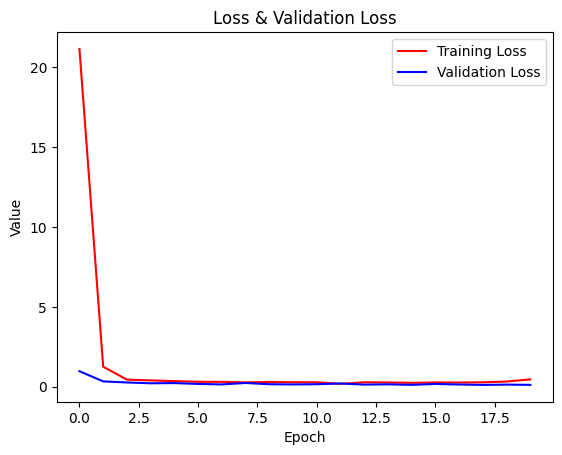

In [ ]:
# plot loss train & validation
plt.plot(history.history['loss'], 'r', label='Training Loss')
plt.plot(history.history['val_loss'], 'b', label='Validation Loss')
plt.title('Loss & Validation Loss')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="upper right")
plt.show()

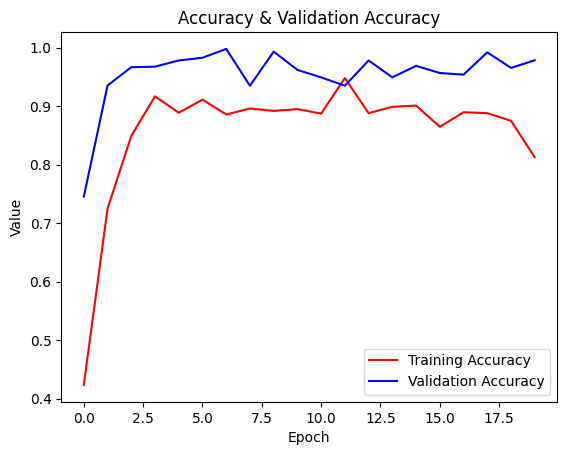

In [ ]:
# plot accuracy train & validation
plt.plot(history.history['accuracy'], 'r', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], 'b', label='Validation Accuracy')
plt.title('Accuracy & Validation Accuracy')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="lower right")
plt.show()

Saving batang.jpeg to batang.jpeg


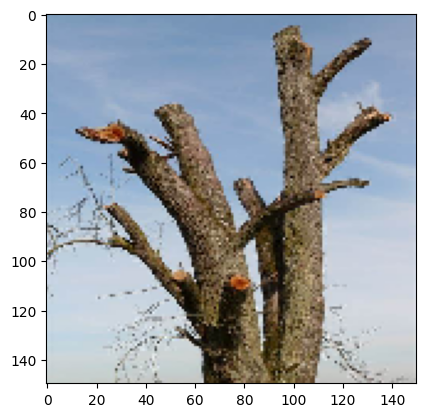

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
batang.jpeg adalah Batang


In [ ]:
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np

# Fungsi untuk mengupload gambar
uploaded = files.upload()

# Memuat gambar yang diupload dan memprosesnya
for fn in uploaded.keys():
    path = fn  # Mendapatkan nama file yang diupload
    img = image.load_img(path, target_size=(150, 150))  # Mengubah ukuran gambar sesuai input model
    imgplot = plt.imshow(img)  # Menampilkan gambar yang diupload
    plt.show()  # Menampilkan gambar di output

    # Mengkonversi gambar menjadi array
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)  # Menambahkan dimensi untuk batch size

    # Melakukan prediksi menggunakan model
    classes = model.predict(x)

    # Menentukan kelas berdasarkan output model
    if classes[0, 0] > classes[0, 1] and classes[0, 0] > classes[0, 2]:
        print(f'{fn} adalah Batang')
    elif classes[0, 1] > classes[0, 0] and classes[0, 1] > classes[0, 2]:
        print(f'{fn} adalah buah')
    else:
        print(f'{fn} adalah daun')


# **Deteksi Objek**

In [ ]:
# Install TensorFlow Object Detection API
!pip install tensorflow opencv-python
!pip install tensorflow-object-detection-api
!git clone https://github.com/tensorflow/models.git

# Install the protobuf compiler
!apt-get install -qq protobuf-compiler python-pil python-lxml python-tk
!pip install -q Cython contextlib2 pillow lxml matplotlib pycocotools

# Compile the TensorFlow Object Detection API protos
!cd models/research && protoc object_detection/protos/*.proto --python_out=.

# Set up the Python environment
import os
os.environ['PYTHONPATH'] += ':/content/models'
os.environ['PYTHONPATH'] += ':/content/models/research'
os.environ['PYTHONPATH'] += ':/content/models/research/slim'

# Test the installation
!python3 models/research/object_detection/builders/model_builder_tf2_test.py


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 577.4/577.4 kB 10.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 86.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 385.8/385.8 kB 25.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.5/133.5 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 744.4/744.4 kB 39.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 43.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 5.5 MB/s eta 0:00:00
  Created wheel for tensorflow-object-detection-api: filename=tensorflow_object_detection_api-0.1.1-py3-none-any.whl size=844489 sha256=84db0934f0685c7593664571bfb

In [ ]:
!wget http://download.tensorflow.org/models/object_detection/ssd_mobilenet_v2_coco_2018_03_29.tar.gz
!tar -xvf ssd_mobilenet_v2_coco_2018_03_29.tar.gz


--2025-01-15 15:00:25--  http://download.tensorflow.org/models/object_detection/ssd_mobilenet_v2_coco_2018_03_29.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 142.251.16.207, 172.253.62.207, 142.251.163.207, ...
Connecting to download.tensorflow.org (download.tensorflow.org)|142.251.16.207|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 187925923 (179M) [application/x-tar]
Saving to: ‘ssd_mobilenet_v2_coco_2018_03_29.tar.gz’

ssd_mobilenet_v2_co 100%[===================>] 179.22M  94.5MB/s    in 1.9s    

2025-01-15 15:00:27 (94.5 MB/s) - ‘ssd_mobilenet_v2_coco_2018_03_29.tar.gz’ saved [187925923/187925923]

ssd_mobilenet_v2_coco_2018_03_29/checkpoint
ssd_mobilenet_v2_coco_2018_03_29/model.ckpt.meta
ssd_mobilenet_v2_coco_2018_03_29/pipeline.config
ssd_mobilenet_v2_coco_2018_03_29/saved_model/saved_model.pb
ssd_mobilenet_v2_coco_2018_03_29/frozen_inference_graph.pb
ssd_mobilenet_v2_coco_2018_03_29/saved_model/
ssd_mobilenet_v2_coco_2018_0

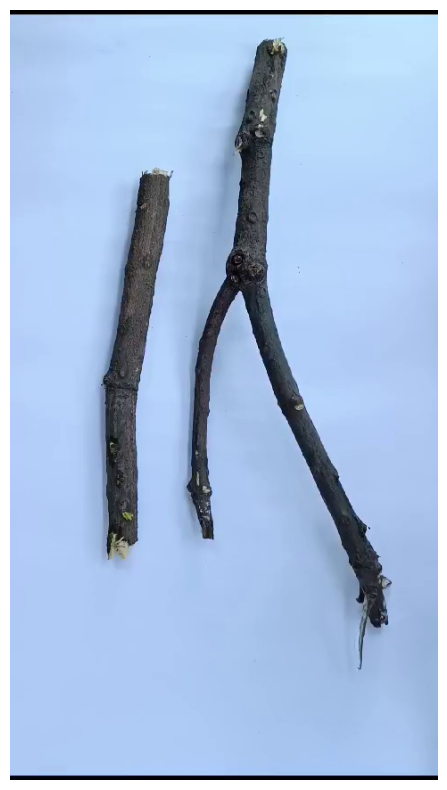

In [ ]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load the SSD MobileNet V2 model
model_dir = 'ssd_mobilenet_v2_coco_2018_03_29/saved_model'
detect_fn = tf.saved_model.load(model_dir)

# Access the serving function from the loaded model
infer = detect_fn.signatures['serving_default']

def load_image_into_numpy_array(path):
    return np.array(cv2.imread(path))

def detect_objects(image_path):
    image_np = load_image_into_numpy_array(image_path)
    input_tensor = tf.convert_to_tensor(image_np)
    input_tensor = input_tensor[tf.newaxis, ...]

    # Perform detection using the correct inference method
    detections = infer(input_tensor)

    # Extract bounding boxes, classes, and confidence scores
    for i in range(int(detections['num_detections'])):
        confidence = detections['detection_scores'][0][i].numpy()
        if confidence > 0.5:  # Confidence threshold
            box = detections['detection_boxes'][0][i].numpy()
            class_id = int(detections['detection_classes'][0][i].numpy())
            ymin, xmin, ymax, xmax = box
            (left, top, right, bottom) = (int(xmin * image_np.shape[1]), int(ymin * image_np.shape[0]),
                                          int(xmax * image_np.shape[1]), int(ymax * image_np.shape[0]))
            cv2.rectangle(image_np, (left, top), (right, bottom), (0, 255, 0), 2)
            label = f"Class {class_id}: {confidence:.2f}"
            cv2.putText(image_np, label, (left, top - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    # Display the image with detections
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(image_np, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

# Test with an image
detect_objects("/content/drive/MyDrive/Deep Learning/Kelompok/UAS - Deep Learning - ANN/gambar/batang/frame_0001.jpg")


In [ ]:
# Example usage
video_path = '/content/drive/MyDrive/Deep Learning/Kelompok/UTS - Deep Learning - ANN/dataset/video/batang.mp4'
output_dir = 'extracted_frames_3'
extract_frames(video_path, output_dir)

# **Segmentasi**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


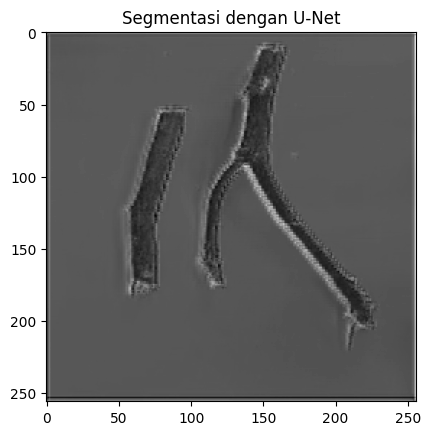

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Memuat gambar yang ingin disegmentasi
image = cv2.imread('/content/drive/MyDrive/Deep Learning/Kelompok/UAS - Deep Learning - ANN/gambar/batang/frame_0001.jpg')
image_resized = cv2.resize(image, (256, 256))  # U-Net biasanya menggunakan input berukuran kecil (misalnya 256x256)
image_normalized = image_resized / 255.0  # Normalisasi gambar

# Menambahkan dimensi batch (karena U-Net membutuhkan input dalam batch)
image_input = np.expand_dims(image_normalized, axis=0)

# Definisi U-Net (sederhana)
def unet_model(input_size=(256, 256, 3)):
    inputs = layers.Input(input_size)
    # Encoder
    conv1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    pool1 = layers.MaxPooling2D((2, 2))(conv1)

    # Decoder
    up1 = layers.UpSampling2D((2, 2))(pool1)
    conv2 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(up1)

    # Output layer
    output = layers.Conv2D(1, (1, 1), activation='sigmoid')(conv2)  # Sigmoid untuk segmentasi biner
    model = models.Model(inputs, output)

    return model

# Membuat dan mengkompilasi model
model = unet_model()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Melatih model (di sini hanya contoh; Anda memerlukan data pelatihan yang sesuai)
# model.fit(train_images, train_masks, epochs=10, batch_size=16)

# Prediksi dengan model (menggunakan gambar yang sudah dinormalisasi)
predicted_mask = model.predict(image_input)

# Menampilkan hasil segmentasi
plt.imshow(predicted_mask[0, :, :, 0], cmap='gray')
plt.title("Segmentasi dengan U-Net")
plt.show()


In [ ]:
# Mengunduh model
from google.colab import files
from tensorflow.keras.models import load_model
import os

# Assuming you saved the model with this name
model_filename = 'plant_model.h5'

# Save the model if it's not already saved
if not os.path.exists(model_filename):
  model.save(model_filename)  # Save the model first

files.download(model_filename)  # Download the saved model